<a href="https://colab.research.google.com/github/RubenQuispe/Machine-Learning-con-Python-001/blob/master/Lab4_M4_Regresi%C3%B3n_Linea_Emisi%C3%B3n_CO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión Lineal Simple ---Predición de Emisión de CO2 
## Mg. Rubén Quispe

# Acerca de este laboratorio
Aprenderemos cómo utilizar la librería scikit-learn para implementar regresión lineal simple. Descargaremos un set de datos relacionado al consumo de combustible y a la emisión del dióxido de Carbono en autos. Luego, separaremos nuestros datos en un set de entrenamiento y en otro set de prueba, crearemos un modelo utilizando un set de entrenamiento, se evaluará utilizando el set de prueba para finalmente usar el modelo para predecir valores desconocidos

# Tabla de contenidos
1. Comprendiendo la data
2. Leyendo la data
3. Explorando la data
4. Modelo de regresión simple

# 1. Importar las librerias 

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

# 2. Cargar los dataset

In [ ]:
df = pd.read_csv("D:/TECHNOLOGY 2020/ADRISK-EIE/EIE/M4_ REGRESIÓN LINEAL/FuelConsumption.csv")

In [ ]:
df.head(9)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267


# Nuestro dataset comprende estos datos

1. MODELYEAR e.g. 2014
2. MAKE e.g. Acura
3. MODEL e.g. ILX
4. VEHICLE CLASS e.g. SUV
5. ENGINE SIZE e.g. 4.7
6. CYLINDERS e.g 6
7. TRANSMISSION e.g. A6
8. FUEL CONSUMPTION in CITY(L/100 km) e.g. 9.9
9. FUEL CONSUMPTION in HWY (L/100 km) e.g. 8.9
10. FUEL CONSUMPTION COMB (L/100 km) e.g. 9.2
11. CO2 EMISSIONS (g/km) e.g. 182 --> low --> 0

# 3 Explorar nuestros dataset
Tengamos primero una exploración descriptiva de nuestros datos.

In [ ]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [ ]:
# Seleccionemos algunas características para explorar más en detalle.
cdf = df[['CYLINDERS', 'ENGINESIZE', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head()

,CYLINDERS,ENGINESIZE,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,4,2.0,8.5,196
1,4,2.4,9.6,221
2,4,1.5,5.9,136
3,6,3.5,11.1,255
4,6,3.5,10.6,244


<function matplotlib.pyplot.show(close=None, block=None)>

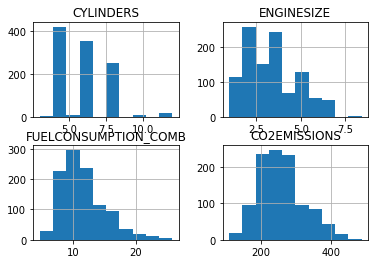

In [ ]:
# Podemos realizar graficos como se comportan estos datos
viz =  cdf[['CYLINDERS', 'ENGINESIZE', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
viz.hist()
plt.show

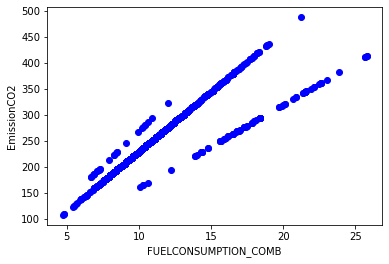

In [ ]:
# Ahora, grafiquemos cada una de estas características frente a la emisión, para ver qué tan lineal es su relación:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color ='blue')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('EmissionCO2')
plt.show()

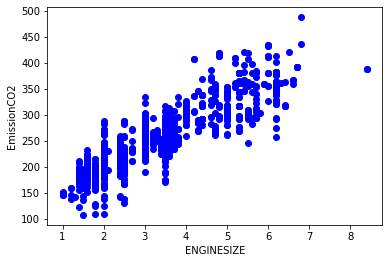

In [ ]:
# ver la grafica de enginesize vs emisionCO2
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color ='blue')
plt.xlabel('ENGINESIZE')
plt.ylabel('EmissionCO2')
plt.show()

# Practica lab
Grafique CILINDRO vs la Emisión, para ver cuán lineal es su relación:

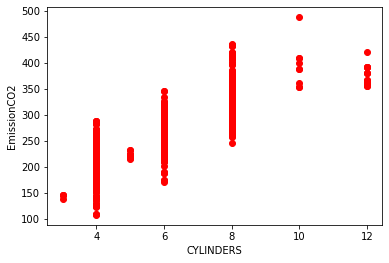

In [ ]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color ='RED')
plt.xlabel('CYLINDERS')
plt.ylabel('EmissionCO2')
plt.show()

# 4 Creando el set de datos de entrenamiento y de el prueba
Train/Test Split divide el dataseet en uno de entrenamiento y otro de pruebas, siendo excluyentes. Después de ello, entrenas con el set de entrenamiento y pruebas con el de prueba. Esto brinda una evaluación más exacta porque el set de entrenamiento no es parte de un set de datos que se usaron para entrenar datos. Refleja un escenario más real basado en problemas más actuales.

Esto significa que sabemos la salida de cada punto de datos del set, siendo un escenario ideal! y como estos datos no se usaron para entrenar el modelo, el modelo no sabe la salida de estos puntos de datos. Asi que, básicamente, es una real prueba fuera de muestra.

Dividamos nuestro conjunto de datos en conjuntos de entrenamiento y de prueba, el 80% de todos los datos para entrenamiento y el 20% para pruebas. Creamos una máscara para seleccionar filas aleatorias usando la función **np.random.rand ():**

In [ ]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

# 5 Modelo de regresión lineal simple
La regresión lineal se ajusta a un modelo lineal con coeficientes 𝜃 = (𝜃1, ..., 𝜃𝑛) θ = (θ1, ..., θn) para minimizar la 'suma de cuadrados residual' entre la x independiente en el conjunto de datos y la y por la aproximación lineal.

# ENTRENAR LA DISTRIBUCIÓN DE DATA 

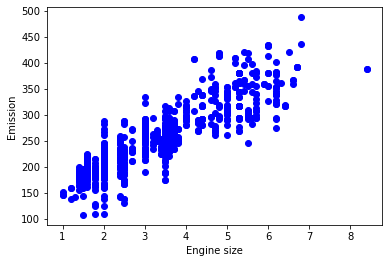

In [ ]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

# Modelando nuestro dataset
Usando package de sklearn para modelar nuestros datos

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.37253385]]
Intercept:  [124.3167178]


**Como** se mencionó antes, **Coeficiente e Intercepción** en la regresión lineal simple, son los parámetros de la recta de ajuste. Dado que es una regresión lineal simple, con 2 parámetros solamente, y sabiendo que los parámetros son la intersección y pendiente de la linea, sklearn puede estimarlas directamente a partir de los datos. Tener en cuenta que todos los datos deben estar disponibles para poder calcular los parámetros.

# 6 Graficando las salidas
podemos trazar o graficar la recta de ajuste sobre los datos:

Text(0, 0.5, 'Emission')

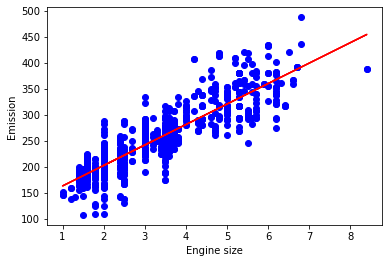

In [ ]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

# 7 Evaluation 
comparamos los valores actuales y predichos para calcular la exactitud del modelo de regresión. Las métricas de la evaluación proveen un rol principal en el desarrollo de un modelo, ya que provee conocimiento profundo en areas que necesitan mejoras.

Existen distintas métricas de evaluación de modelos, utilicemos MSE para calcular la exactitud de nuestro modelo basado en el set de prueba:

* Error absoluto de media o **Mean absolute error**: Es una media del valor absoluto de los errores. Es la métrica más fácil de comprender ya que simplemente es el promedio de los errores.
* Error Cuadrado Medio (MSE-**Mean Squared Error**):MSE es la media del error cuadrático. Es más popular que el error absoluto medio porque hace foco en grandes errores. Esto se debe a que el término cuadrático tiene errores más grandes que van creciendo en comparación con más pequeños.
* **Root Mean Squared Error**(RMSE). esta es la raiz cuadrada del error cuadrático medio.
* **R-squared** no es un error, sino que es una medida popular para darle precisión a nuestro modelo. Representa cuán cerca están los datos de la linea de regresión ajustada. Mientras más alto el R-cuadrático, mejor se encontrará ajustado el modelo respecto de los datos. El puntaje mejor posible es 1.0 y puede tomar valores negativos (porque el modelo puede ser arbitrariamente peor).

In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 23.09
Residual sum of squares (MSE): 825.79
R2-score: 0.70


# GRACIAS